## Import Library

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Menentukan Direktori Dataset

Di sini, kita menetapkan path ke direktori dataset yang berisi gambar sampah. Dataset dibagi menjadi dua folder utama:
- `TRAIN`: untuk data pelatihan
- `TEST`: untuk data pengujian

In [3]:
base_dir = 'dataset'

train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

## Preprocessing Data 

In [4]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='binary')

test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(128, 128),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [5]:
classes = list(train_generator.class_indices.keys())

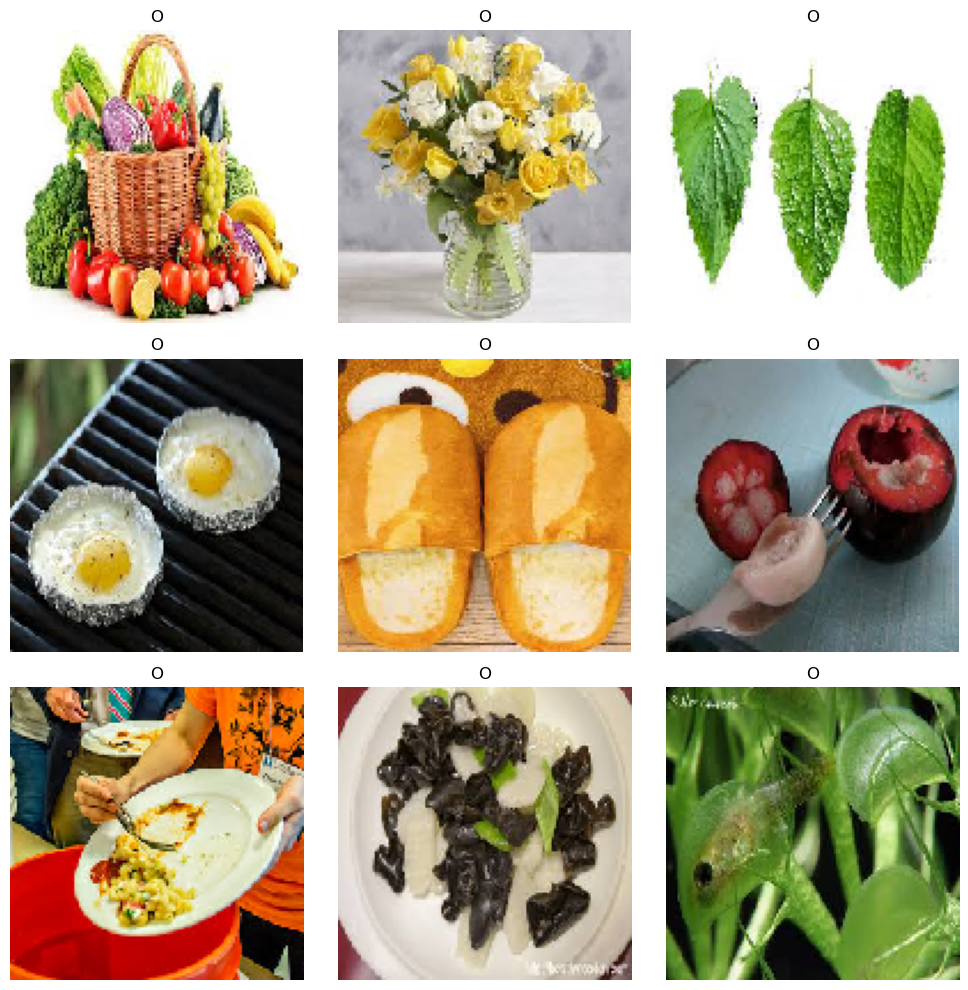

In [6]:
images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

## Melatih Model

In [9]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=5)

Epoch 1/5


706/706 [==============================] - 384s 542ms/step - loss: 0.4415 - accuracy: 0.8109 - val_loss: 0.3044 - val_accuracy: 0.8886
Epoch 2/5
706/706 [==============================] - 252s 357ms/step - loss: 0.3731 - accuracy: 0.8449 - val_loss: 0.3195 - val_accuracy: 0.8806
Epoch 3/5
706/706 [==============================] - 124s 176ms/step - loss: 0.3455 - accuracy: 0.8612 - val_loss: 0.2545 - val_accuracy: 0.9093
Epoch 4/5
706/706 [==============================] - 128s 181ms/step - loss: 0.3124 - accuracy: 0.8721 - val_loss: 0.2827 - val_accuracy: 0.8914
Epoch 5/5
706/706 [==============================] - 190s 269ms/step - loss: 0.2839 - accuracy: 0.8861 - val_loss: 0.2800 - val_accuracy: 0.9065


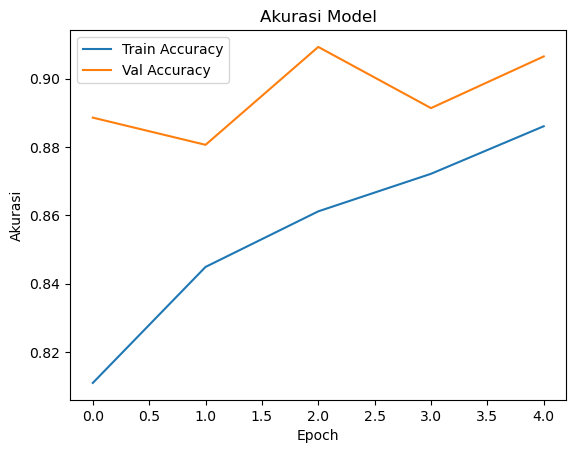

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.show()


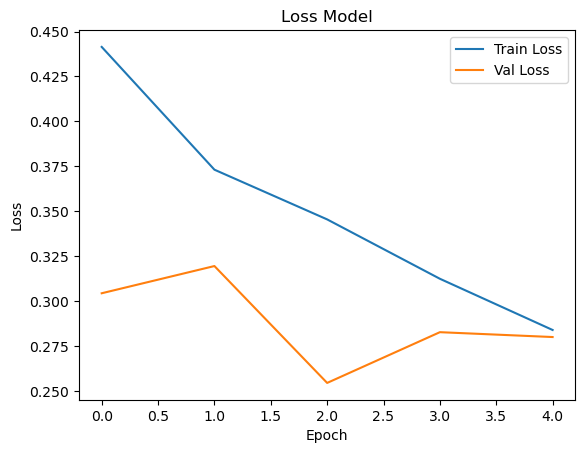

In [11]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Evaluasi Model

In [12]:
y_pred = model.predict(test_generator)
y_pred_labels = (y_pred > 0.5).astype(int)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_labels, target_names=classes))

79/79 [==============================] - 6s 69ms/step
              precision    recall  f1-score   support

           O       0.87      0.97      0.92      1401
           R       0.96      0.82      0.89      1112

    accuracy                           0.91      2513
   macro avg       0.92      0.90      0.90      2513
weighted avg       0.91      0.91      0.91      2513

